Сегодня мы попробуем поработать с библиотекой scikit-learn. Эта библиотека включает в себя множество алгоритмов, несколько тестовых наборов данных, функции для подсчета метрик и подбора параметров.

---

Scikit-learn появился как проект David Cournapeau на Google Summer of Code. Позднее к проекту присоединились другие разработчики, и первый релиз библиотеки состоялся 1 февраля 2010 года. Она быстро стало популярной за большое количество алгоритмов и простоту использования. sklearn полезна для экспериментов,  написания быстрых прототипов, участия в соревнованиях по анализу данных и во множестве других приложения. В тоже время, для промышленных проектов она может не подходить ввиду не оптимизированного кода и выбранного языка.



Возьмем стандартный датасет c помощью функции load_boston. Датасет содержит информацию о ценах на квартиры и какие-то параметры квартиры: близость к реке, криминогенная обстановка в районе и т.д.

In [1]:
from sklearn.datasets import load_boston

In [14]:
print(type(data))

<class 'sklearn.utils.Bunch'>


In [12]:
data = load_boston()
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Прочитать описание датасета можно выполнив строчку: `print(data['DESCR'])`

In [15]:
X, y = data['data'], data['target']

In [16]:
print("Размер матрицы объектов: ", X.shape)
print("Рaзмер вектора y: ", y.shape)

Размер матрицы объектов:  (506, 13)
Рaзмер вектора y:  (506,)


Посмотрим на наши данные. Давайте построим  график того, как зависит цена от криминогенной обстановки. Для этого воспользуемся библиотекой matplotlib.

In [17]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Price')

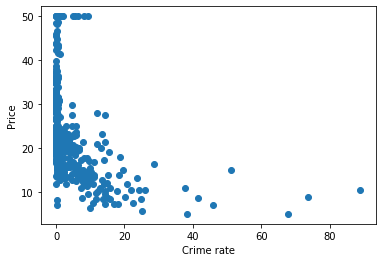

In [18]:
plt.scatter(X[:, 0], y)
plt.xlabel('Crime rate')
plt.ylabel('Price')

Как мы видим, все закономерно, дорогие квартиры находятся в районах с низким уровнем преступности.

In [26]:
from sklearn.model_selection import train_test_split

С помощью функции `train_test_split` разобьем выборку на `train` и `test`.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
from sklearn.neighbors import KNeighborsRegressor


В sklearn, разные методы лежат в разных модулях. Например в linear_model находятся линейные модели, в neighbors - методы основанные на ближайших соседях.

Импортируем алгоритм knn из sklearn. Работа с алгоритмами машинного обучения в библиотеке состоит из трех этапов.



1.   Создание объекта, который будет реализовывать алгоритм.
2.   Вызов `fit`: обучение модели на тренировочной подвыборке
3.   Вызов `predict`: получение предсказаний на тестовой выборке



In [29]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)

In [30]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [34]:
predictions = knn.predict(X_test)

array([35.72, 21.12, 21.78, 21.44, 15.02, 23.62, 17.76, 23.62, 21.3 ,
       32.7 , 21.64, 11.66, 21.74, 18.48, 38.26, 20.88, 38.26, 23.74,
       17.14, 24.78, 22.22, 15.92, 24.9 , 14.4 , 20.82, 45.58, 22.02,
       24.66, 24.86, 31.14, 20.82, 12.22, 33.46, 23.1 , 27.02, 20.88,
       10.86, 27.62, 28.24, 24.56, 27.84, 21.94, 13.34, 20.46, 17.38,
       27.86, 21.98, 25.6 , 19.14, 11.06, 34.62, 19.02, 16.72, 29.4 ,
       30.72, 32.02, 22.54, 27.24, 34.08, 13.34, 21.56, 28.24, 16.62,
       37.06, 34.92, 20.46, 20.84, 25.74, 21.64, 28.4 , 32.74, 37.06,
       19.76, 20.18, 23.36, 17.44, 21.78, 19.26, 17.88, 24.04, 22.78,
       10.8 , 22.38, 24.04, 25.36, 15.2 , 27.78, 27.54, 38.26, 34.56,
       14.8 , 29.12, 29.46, 28.14, 21.42, 38.88, 24.66, 27.72, 27.86,
       28.4 , 20.  , 23.68])

Отлично! Мы получили предсказания. Посчитаем метрику, соответствующая функция есть в scikit-learn! Будет считать средне квадратичную ошибку, так как мы решаем задачу регрессии.

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mean_squared_error(y_test, predictions)

37.5018862745098

Давайте попробуем сделать лучше! У нашего алгоритма есть множество гиперпараметров: количество соседей, параметры метрики и веса. Запустим поиск по сетке гиперараметров, алгоритм переберет все возможные комбинации, посчитает метрику для каждого набора и выдаст лучший набор.

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid_searcher = GridSearchCV(KNeighborsRegressor(),
                             param_grid={'n_neighbors': range(1, 40, 2),
                                         'weights': ['uniform', 'distance'],
                                         'p': [1, 2, 3]},
                             cv=5)

Параметр cv=5 говорит, что во время поиска оптимальных парамертов будет использоваться кросс-валидация с 5 фолдами. Давайте вспомним, что это такое: 

![alt text](https://miro.medium.com/max/700/1*rgba1BIOUys7wQcXcL4U5A.png)
https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

В нашем случае, выборка будет разделена на 5 частей и на каждой из 5 итераций, часть данных будет становиться тестовой выборкой, а другая часть - обучающей. Посчитав метрики на каждой итерации, мы сможем усреднить их в конце и получить достаточно точную оценку качества нашего алгоритма.

In [40]:
grid_searcher.fit(X_train, y_train);

In [42]:
grid_searcher.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

Попросим предсказание лучшей модели.

In [43]:
best_predictions = grid_searcher.predict(X_test)

In [44]:
mean_squared_error(y_test, best_predictions)

29.55083275586426

Давайте посмотрим на качество алгоритма в зависимости от количества соседей. Качество будем оценивать на обучающей выборке 


In [46]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [47]:
metrics = []
for n in range(1, 40, 2):
  knn = KNeighborsRegressor(n_neighbors=n)
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  metrics.append(np.mean(scores))

In [48]:
metrics

[-54.96228518518518,
 -44.53091615226337,
 -45.359644580246915,
 -47.484574874023686,
 -49.72520121170554,
 -50.511636950311186,
 -53.021210234494845,
 -55.15923904526748,
 -57.34844659959845,
 -58.42117903457474,
 -60.173625151171585,
 -61.337049420639914,
 -62.252244087901225,
 -63.30595487857541,
 -64.01996514731141,
 -64.6427623251243,
 -65.67380264230407,
 -66.34233144872765,
 -66.52839452515578,
 -67.399716617357]

In [49]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Number of neightbors')

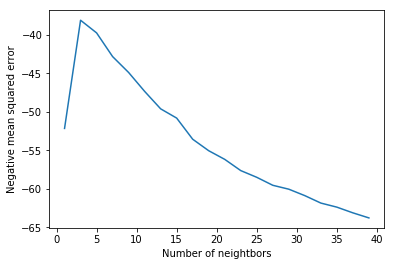

In [0]:
plt.plot(range(1, 40, 2), metrics)
plt.ylabel('Negative mean squared error')
plt.xlabel('Number of neightbors')

Помимо готовых датасетов, в библиотеке sklearn можно найти функции для генерации искусственных данных. Давайте сгенерируем датасет для классификации и визуализируем его.

In [51]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2)

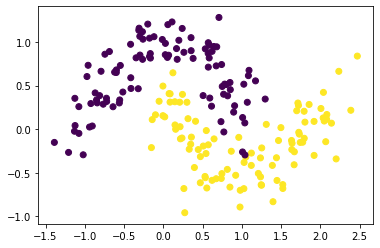

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Мы получили два слегка зашумленных месяца. Давайте обучим knn на этих данных и визуализируем пространство предсказаний.



In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Для визуализации построим массив, который будет содержать в себе все точки в окрестности данных с некоторым шагом.

In [57]:
x_grid, y_grid = np.meshgrid(np.linspace(-2.0, 3.0, 100), np.linspace(-2.0, 2.0, 100))
xy = np.stack([x_grid, y_grid], axis=2).reshape(-1, 2)
xy

array([[-2.        , -2.        ],
       [-1.94949495, -2.        ],
       [-1.8989899 , -2.        ],
       ...,
       [ 2.8989899 ,  2.        ],
       [ 2.94949495,  2.        ],
       [ 3.        ,  2.        ]])

In [59]:
predicted = knn_clf.predict(xy)

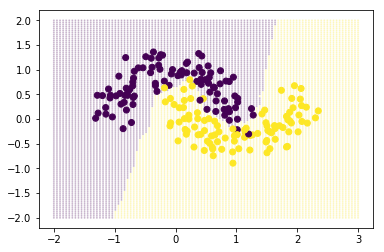

In [0]:
plt.scatter(xy[:, 0], xy[:, 1], c=predicted, alpha=0.2, s=1)
plt.scatter(X[:, 0], X[:, 1], c=y)

На картинке вы можете увидеть исходные данные и границу, которую knn возвел между классами. Поэксперементируйте с параметром n_neighbors и посмотрите, как он влияет на итоговый результат.